In [37]:
import tensorflow as tf
# tf.__version__

In [38]:
import zipfile,os
 
base_dir = '../input/4-animal-classification/'
train_dir = os.path.join(base_dir, 'train')

In [39]:
os.listdir('../input/4-animal-classification/train')

['horse', 'dog', 'cat', 'deer']

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
image_datagen = ImageDataGenerator(
#                     rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2,
                    width_shift_range=0.1,
                    height_shift_range=0.1,)

# Rescale kalo resolusi gambar seragam
# Ga perlu rescale kalo resolusi beda-beda

train_generator = image_datagen.flow_from_directory(
        train_dir,
        subset='training',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical'
        )

validation_generator = image_datagen.flow_from_directory(
        train_dir,
        subset='validation',
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical'
        )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


In [35]:
model = tf.keras.models.Sequential([
    # Input
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Blok 1
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Blok 2
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Blok 3
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Blok 3
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.GlobalAveragePooling2D(),

    #Flatten
    tf.keras.layers.Flatten(),
    
    # Fully
    tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 512)      

In [41]:
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

transfer = tf.keras.applications.efficientnet.EfficientNetB3(
              input_shape=(300,300,3),
              include_top=False,
              weights='imagenet'
)

# Include Top
# Kalo True -> Fully Connected Layer bawaan (Output Layer)
# Kalo False -> Fully Connected Layer bisa di modifikasi (Output Layer)

model = tf.keras.models.Sequential([
    transfer,
    tf.keras.layers.GlobalAveragePooling2D(),

    #Flatten
    tf.keras.layers.Flatten(),
    
    # Fully
    tf.keras.layers.Dense(1280, activation='relu'),
#     tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dense(8, activation='relu'),
    
    # 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 10, 10, 1536)      10783535  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 1536)              0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1280)              1967360   
_________________________________________________________________
dense_28 (Dense)             (None, 128)               163968    
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 12,915,379
Trainable params: 12,828,076
Non-trainable params: 87,303
_____________________________________

In [42]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0010, momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

checkpoint = ModelCheckpoint("checkpoints/best.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

In [45]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,                    
      epochs=20,                              # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator,   # menampilkan akurasi pengujian data validasi
      callbacks = [early, checkpoint],
      verbose=2
)

Epoch 1/20
70/70 - 105s - loss: 1.1950 - accuracy: 0.5964 - val_loss: 0.8261 - val_accuracy: 0.9411

Epoch 00001: val_accuracy improved from -inf to 0.94107, saving model to checkpoints/best.h5
Epoch 2/20
70/70 - 90s - loss: 0.6605 - accuracy: 0.8915 - val_loss: 0.3596 - val_accuracy: 0.9625

Epoch 00002: val_accuracy improved from 0.94107 to 0.96250, saving model to checkpoints/best.h5
Epoch 3/20
70/70 - 89s - loss: 0.3180 - accuracy: 0.9357 - val_loss: 0.1965 - val_accuracy: 0.9643

Epoch 00003: val_accuracy improved from 0.96250 to 0.96429, saving model to checkpoints/best.h5
Epoch 4/20
70/70 - 91s - loss: 0.1884 - accuracy: 0.9629 - val_loss: 0.1478 - val_accuracy: 0.9679

Epoch 00004: val_accuracy improved from 0.96429 to 0.96786, saving model to checkpoints/best.h5
Epoch 5/20
70/70 - 89s - loss: 0.1398 - accuracy: 0.9652 - val_loss: 0.1108 - val_accuracy: 0.9714

Epoch 00005: val_accuracy improved from 0.96786 to 0.97143, saving model to checkpoints/best.h5
Epoch 6/20
70/70 - 89s

In [62]:
results = model.evaluate(validation_generator)
print(f"test loss {results[0]}, test accuracy {results[1]}")

18/18 [==============================] - 15s 819ms/step - loss: 0.0650 - accuracy: 0.9804
test loss 0.06495903432369232, test accuracy 0.9803571701049805


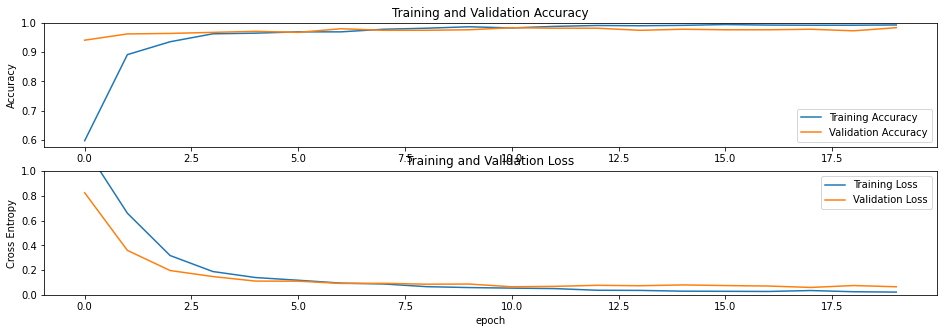

In [63]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 5))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [64]:
test_path = '../input/4-animal-classification/test/test'
test_gen = image_datagen.flow_from_directory(    
    directory=test_path,
    target_size=(300, 300),
    batch_size=32,
    classes=['.'],
    shuffle=False,
)

Found 729 images belonging to 1 classes.


In [65]:
from PIL import Image
predict = []

In [66]:
import numpy as np
for i in range(1,730):
    img = Image.open('../input/4-animal-classification/test/test/'+str(i)+'.jpg')
    img = img.resize((300,300))
    c_predict = model.predict(np.asarray(img).reshape(-1,300,300,3))
    predict.append(c_predict)
    if(i % 100 == 0):
        print(i, "Predicted")

100 Predicted
200 Predicted
300 Predicted
400 Predicted
500 Predicted
600 Predicted
700 Predicted


In [68]:
import pandas as pd
predictions = np.argmax(predict,axis=2)
submission_file = pd.read_csv("../input/4-animal-classification/Sample_submission.csv")
submission_file['Label'] = predictions
submission_file.to_csv('submission3.csv', index=False)
submission_file['Label'].value_counts()

2    235
0    198
3    165
1    131
Name: Label, dtype: int64

In [69]:
submission_file

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
...,...,...
724,725,1
725,726,2
726,727,2
727,728,2
